# Исследование закономерностей определяющих успешность компьютерной игры.

Цель работы - выявление закономерностей, определяющих успешность игр. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании в интернет-магазине «Стримчик» на 2017 год.

1. [Открытие файла с данными и изучение общей информации](#start)
    * [Проверка данных на наличие дубликатов](#duplicates)
    
2. [Предобработка данных](#preprocessing)
    * [Изменение регистра в названии столбцов](#name)
    * [Изменение типов данных в столбца](#type) 
    * [Поиск и удаление пропущенных значенний в столбцах](#null)
    * [Добавление нового столбца с суммой продаж во всех регионах](#new)
    
3. [Исследовательский анализ данных](#analiz)
    * [Сколько игр выпускалось в разные года](#year)
    * [Анализ изменения продаж по платформам](#platform)
    * [Актуальные данные](#actual)
    * [Построение ящика с усами по глобальным продажам игр ](#global_game)
    * [Влияние на продажи игр отзывов пользователей и критиков](#critic)
    * [Анализ жанров](#genre)
    
4. [Портрет пользователя для каждого региона ](#portret)
    * [Определение популярных платформ](#popular_platform)
    * [Популярные жанры](#popular_genre)
    * [Влияние рейтинга ESRB на продажи](#esrb)
    
5. [Проверка гипотез](#gip)
    * [Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые](#gip1)
    * [Средние пользовательские рейтинги жанров Action и Sports разные](#gip2)
    
6. [Вывод](#all)

## 1 Открытие файла с данными и изучение общей информации
<a id="start"></a> 

In [1]:
import pandas as pd #имортируем библиотеку pandas 
df = pd.read_csv('games.csv') #создаем переменную с данными из файла
df. head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
df.info() #вывод общей информации о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df.describe()#числовое описание всех данных

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Выбросы в этих данных не наблюдаются

### 1.1 Проверка данных на наличие дубликатов
<a id="duplicates"></a> 

In [4]:
print('Количество дубликатов:',df.duplicated().sum())
for i in df.columns:
    if df[i].duplicated().sum() > 0:
        print(i, df[i].duplicated().sum())
    else:
        'good'

Количество дубликатов: 0
Name 5155
Platform 16684
Year_of_Release 16677
Genre 16702
NA_sales 16313
EU_sales 16408
JP_sales 16471
Other_sales 16560
Critic_Score 16632
User_Score 16618
Rating 16706


Наличие дубликатов везде, кроме name является нормой, теперь проверим какие именно дубликаты в этом столбце и с чем они связаны.

In [5]:
dupl = df['Name'].duplicated()
name_dupl = pd.merge(df, dupl, left_index=True, right_index=True, how='inner')
name_dupl.head(20)

,Name_x,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating,Name_y
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,False
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,False
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,False
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,False
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,False
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,False
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,False
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,False
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,False
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,False


Судя по всему дубликаты в названии игр есть из-за того, что такие игры выходили на разные платформы. Их удалять будет не целесообразно, так как это можно считать разными данными, т.е. не дубликатами. 

В ходе знакомства с данными было выявлено 6 столбцов с пропусками данных. Так же было выявлено 2 столбца, в которых нужно изменить тип данных. И были выявлены дубликаты в столбце с названием игр, но их убирать не целесообразно, так как эти игры выпущены на разных платформах. Для дальнейшей работы с данными изменим регистр в названиях столбцов.

## 2  Предобработка данных
<a id="preprocessing"></a> 

### 2.1  Изменение регистра в названии столбцов
<a id="name"></a> 

In [6]:
df.columns=['name','platform','year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales',
            'critic_score','user_score','rating']
df #вывод таблицы для проверки изменения названия столбцов

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Мы измениили регистр столбцов, теперь можно переходить к изменение типов данных

### 2.2  Изменение типов данных в столбца
<a id="type"></a>

In [7]:
df['user_score'].unique() #вывод уникальных значений в столбце

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Нам нужно изменить тип данных в user_score на float64. Но для этого сначала нужно разобраться с аббревиатурой tbd в данном столбце. TBD это to be determined, что в переводе с английского означает "подлежит определению". Это значит, что еще не определена оценка игры пользователями, поэтому можем заменить эту аббревиатуру на NaN, а затем изменим тип данных.

In [8]:
df['user_score']=df['user_score'].replace('tbd','NaN') # изменение tbd на NaN
df['user_score']=df['user_score'].astype('float64')

In [9]:
df.info() # проверка изменения типа данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [10]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

В данном столбце все значения целые, поэтому можно смело менять тип данных на int, после удаления или замены в нем пропусков

Так же нам нужно изменить тип данных в столбце year_of_release, но для этого сначала нужно удалить пропуски в данном столбце, что мы сделаем в следующем блоке

### 2.3  Поиск и удаление пропущенных значенний в столбцах
<a id="null"></a>

In [11]:
df.isna().sum() #вывод количества пропусков в таблице по столбцам

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

В столбцах name, year_of release, genre обнаружено в сумме 273 пропуска, что незначительно по отношению к количеству всех данных, поэтому пропуски в этих столбцах можно удалить.

In [12]:
df= df.dropna(subset=['name']).reset_index(drop=True)
df= df.dropna(subset=['year_of_release']).reset_index(drop=True)
df= df.dropna(subset=['genre']).reset_index(drop=True)

In [13]:
df.isna().sum() #проверка удаления пропусков

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Теперь мы можем изменить тип данных в столбце year_of_release

In [14]:
#изменение типа данных
df['year_of_release']=df['year_of_release'].astype('int32')

In [15]:
df.info() # проверка изменения типа данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


Пропуски в user_score можно в теории заменить на 0, что будет означать ,что оценку еще не поставили. Так же можно будет поступить с пропусками в столбце critic_score.  Но для начала проверим как много в данных столбцах значений с рейтингом 0. Если таких рейтингов много, то пропуски в этих столбцах можно будет оставить.

In [16]:
#срез данных
df[df['user_score']== 0] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2797,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,NaN,0.0,E


In [17]:
#срез данных
df[df['critic_score']== 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Получается, что только в user_score есть одна игра с рейтингом 0, поэтому можно смело менять пропуски в user_score и critic_score на 0, что будет означать, что рейтинг еще не посчитан

In [18]:
#изменение пропущенных значений на 0
df['user_score']=df['user_score'].fillna(0)
df['critic_score']=df['critic_score'].fillna(0)

In [19]:
df.isna().sum() #проверка удаления пропусков

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

In [20]:
df['critic_score']=df['critic_score'].astype('int32') #изменение типа данных в столбце 

In [21]:
df.info() # проверка изменения типа данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.3+ MB


In [22]:
df# вывод на экран датафрейма

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.0,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0.0,NaN


У нас остались пропуски в столбце rating. При проверке в ручную (пропусков) рейтинга в компании ESRB было обнаружено, что данные в интернете есть, но проверить 6676 пропусков вручную долго и возможно на момент сбора данных действительно не стоял рейтинг у определенных игр. Так же есть пропуски, где на данный момент времени действительно нет рейтинга игры у данной огранизации, но есть рейтинг игры в другой орагнизации, например PEGI(Pan European Game Information) или CERO(Computer Entertainment Rating Organization). Лучшего всего в данном столбце пропуски не удалять, а заменить на tbd, что будет значить, что рейтинг организация ESRB еще не поставила. Для повторного анализа игр, лучше всего будет сделать сбор данных с рейтингом возраста по разным организациям, которые составляют такой рейтинг.

In [23]:
#замена пропущенных значений 
df['rating']= df['rating'].fillna('tbd')

In [24]:
df.isna().sum() #проверка удаления пропусков

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### 2.4  Добавление нового столбца с суммой продаж во всех регионах
<a id="new"></a>

In [25]:
df['all_sales']= df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)#создание нового столбца

In [26]:
df #вывод на экран таблицы с новым столбцом 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,tbd,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,tbd,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.0,tbd,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,tbd,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0.0,tbd,0.01


В данном блоке мы изменили регистр названия столбцов, изменили типы данных, там где это было нужно и удалили или заменили пропуски в столбцах. Теперь мы можем перейти к дальнейшему анализу данных

## 3 Исследовательский анализ данных
<a id="analiz"></a>

### 3.1 Сколько игр выпускалось в разные года
<a id="year"></a>

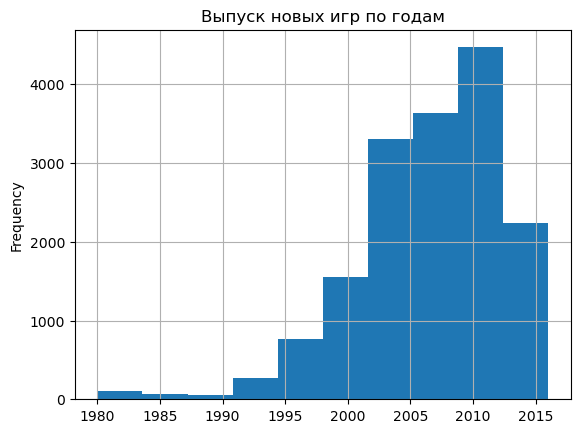

In [27]:
import matplotlib.pyplot as plt #импортирование библиотеки matplotlib

#построение гистограммы 
df['year_of_release'].plot(kind='hist', bins=10, grid=True, xlabel='года', title='Выпуск новых игр по годам', ylabel='Год') 
plt.show()

По данной гистограмме видно, что рост выпуска новых игр происходит с 1991 года, до этого редко выходили новые компьютерные игры, так как тогда только происходило зарождение всего этого. Поэтому мы можем убрать данные о играх, которые вышли раньше 1991 года, чтобы проводить дальнейший анализ по большому количеству данных. 

In [28]:
df=df.query('year_of_release > 1991 ').reset_index(drop=True) #делаем срез данных с выходом игр после 1991 года
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
3,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,tbd,31.38
4,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16177,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,tbd,0.01
16178,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.0,tbd,0.01
16179,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,tbd,0.01
16180,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0.0,tbd,0.01


### 3.2 Анализ изменения продаж по платформам
<a id="platform"></a>

Для данного анализа нам нужно создать сводную таблицу, где будут видны платформы, год выхода игры и общая сумма продаж. Для начала построим график по которому будет видно в какие года существовали платформы.

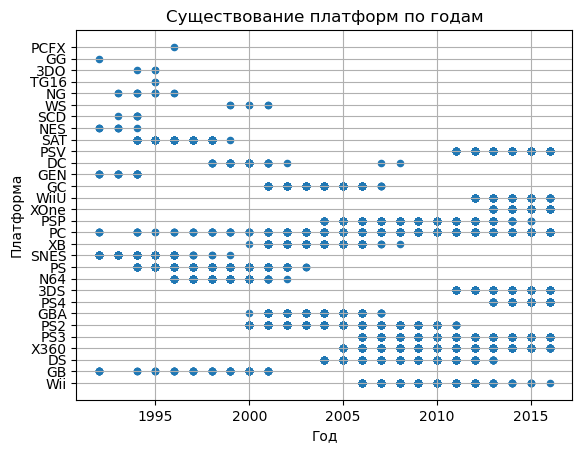

In [29]:
df.plot(kind='scatter', x='year_of_release', y='platform', grid=True) #построение графика
plt.xlabel('Год')
plt.ylabel('Платформа')
plt.title('Существование платформ по годам')
plt.show()

Теперь создадим цикл, который будет создавать сводную таблицу по каждой платформе и будет строить график распределения по годам и количеству всех продаж в определенный год.

In [30]:
import warnings 
warnings.filterwarnings("ignore") #убрать красные текстовые предупреждения

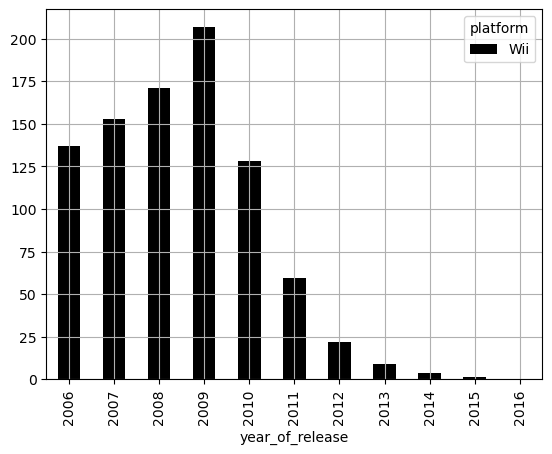

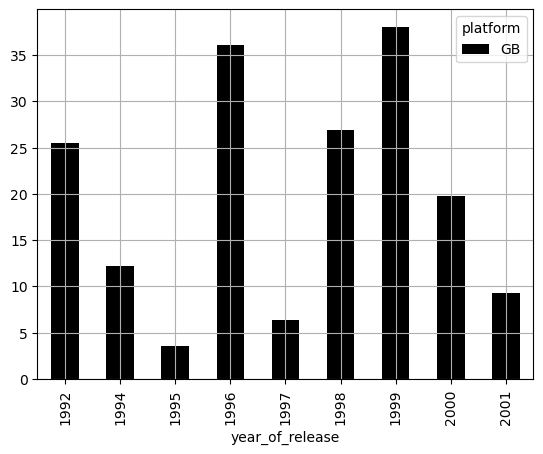

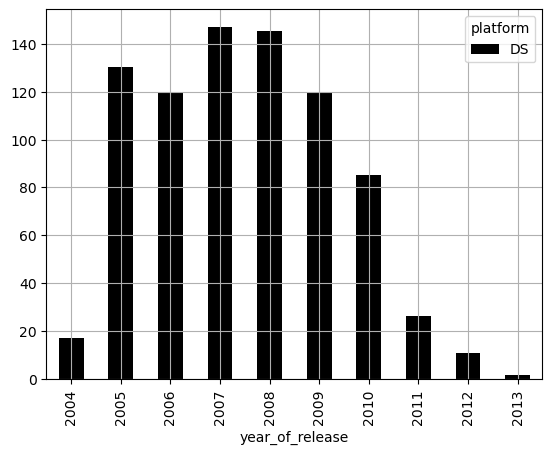

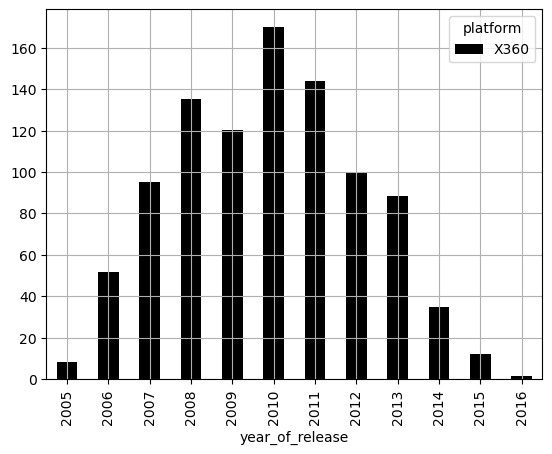

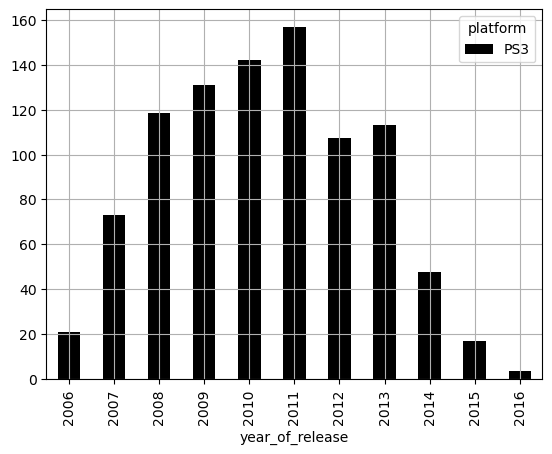

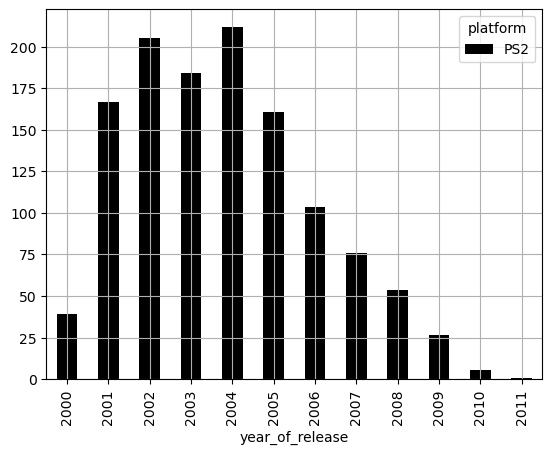

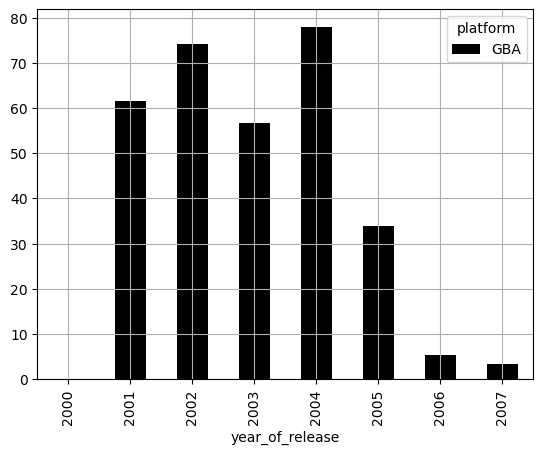

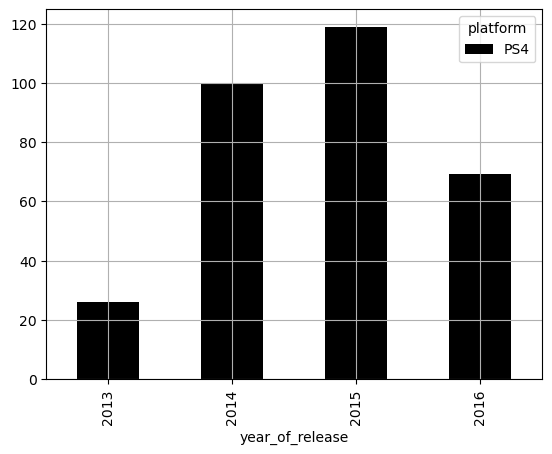

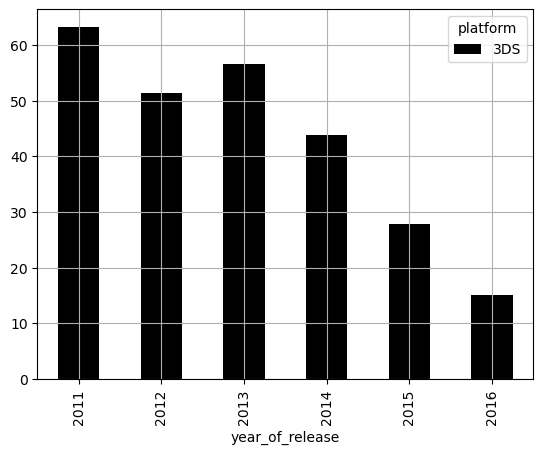

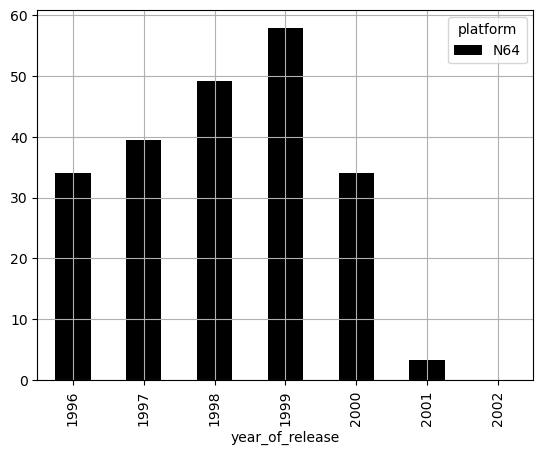

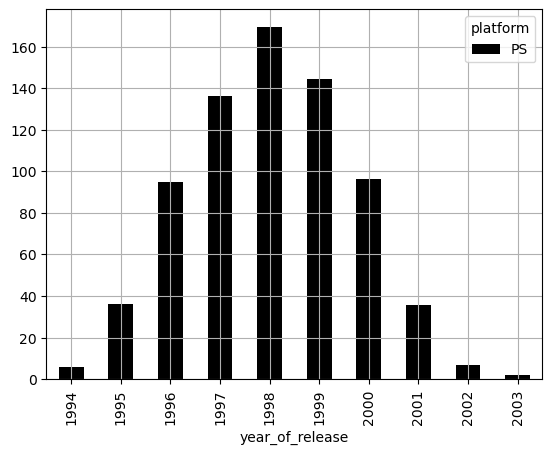

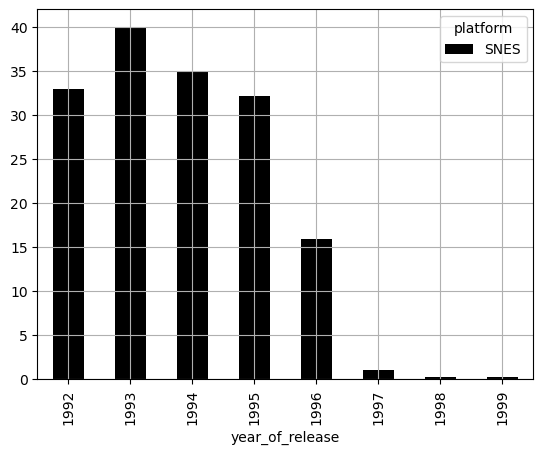

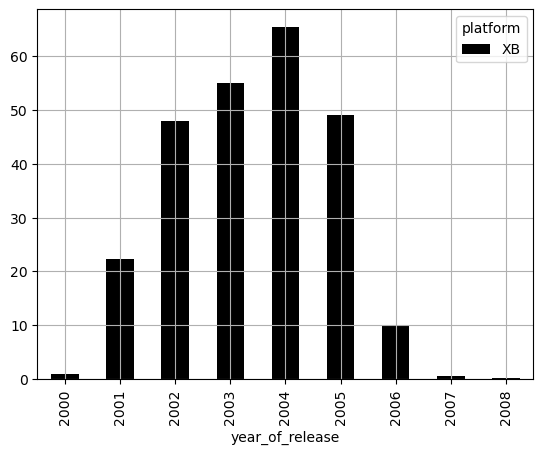

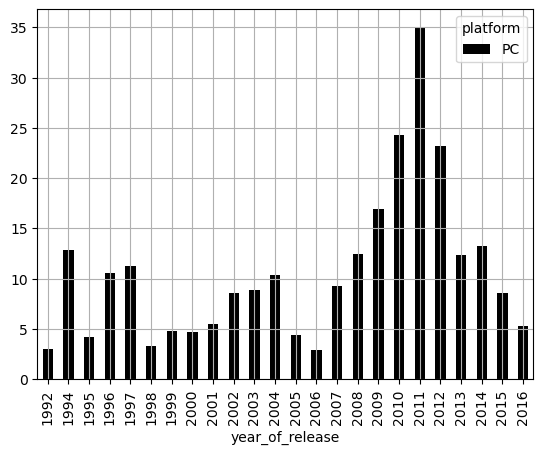

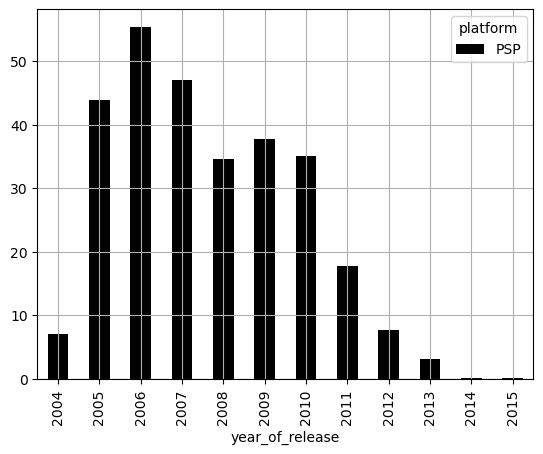

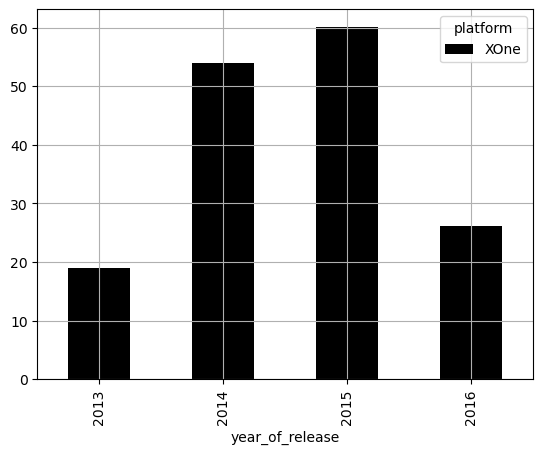

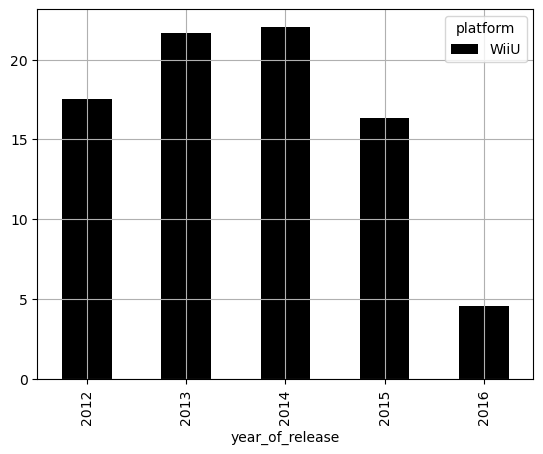

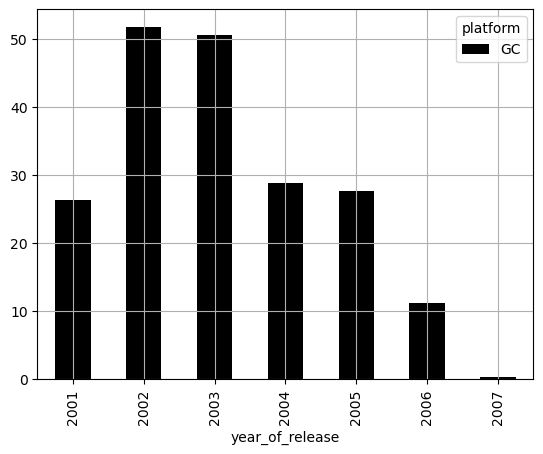

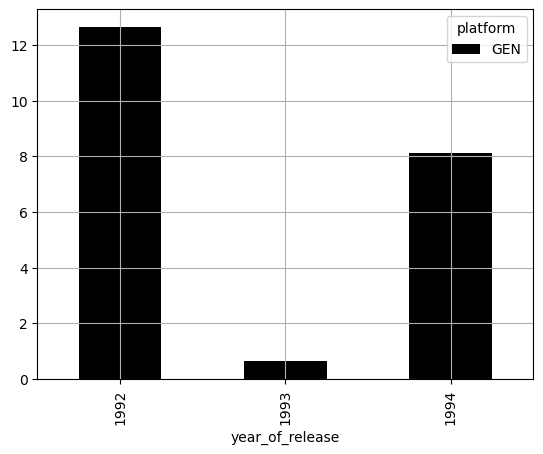

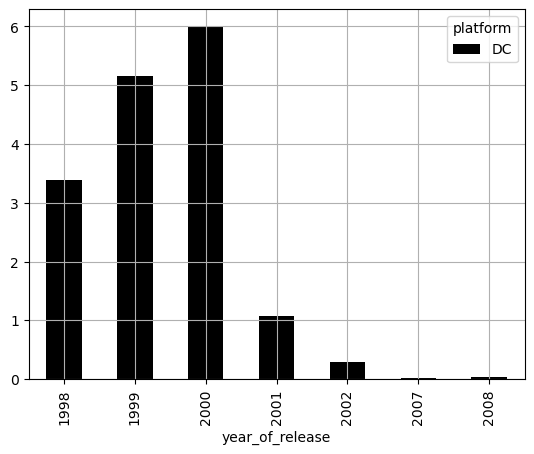

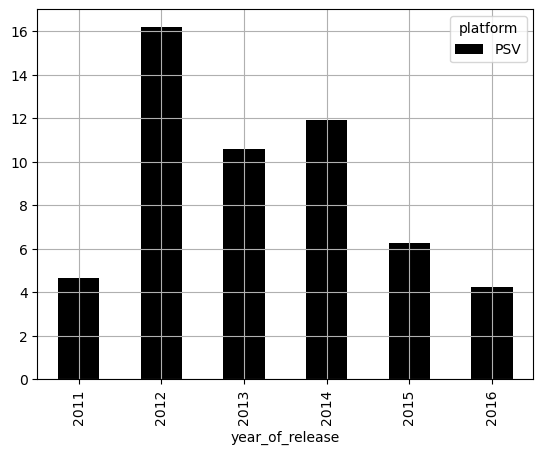

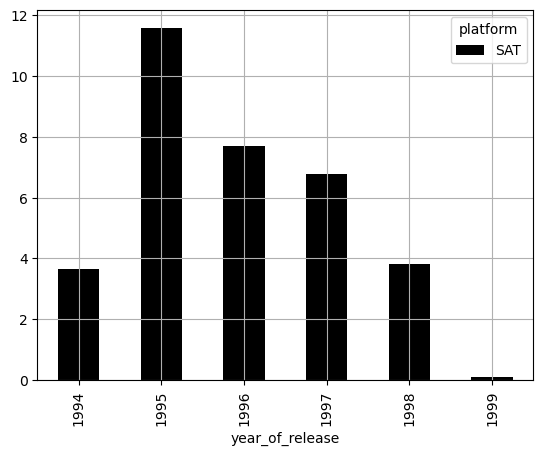

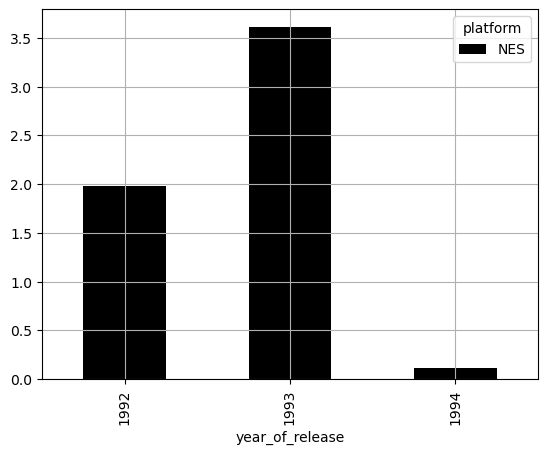

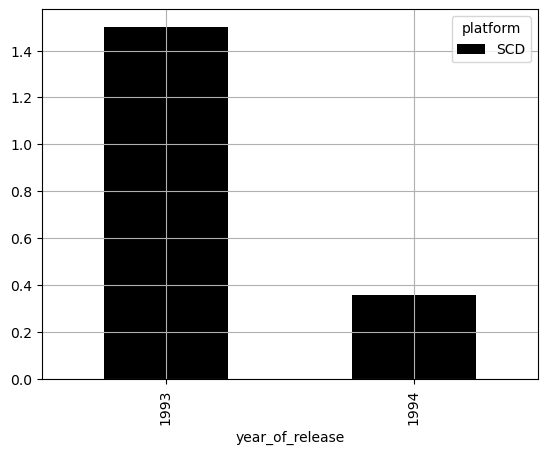

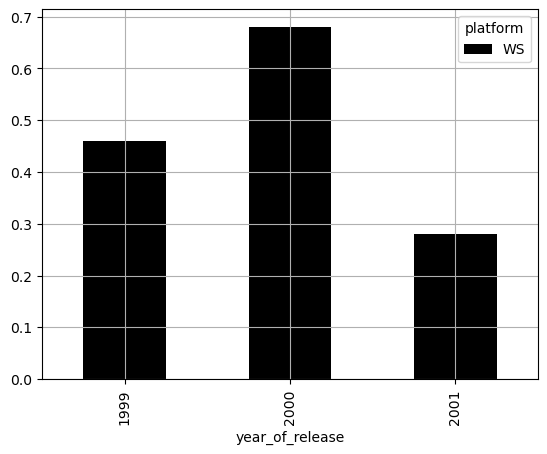

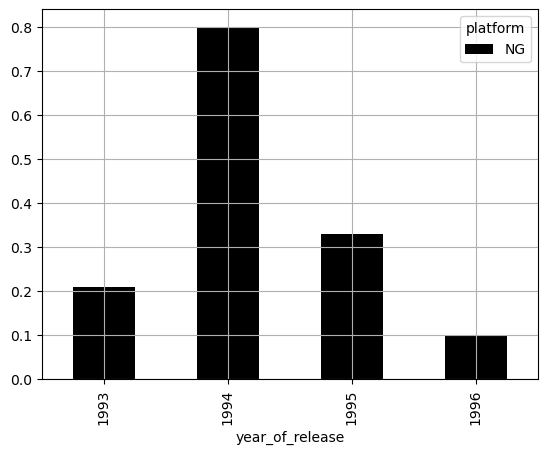

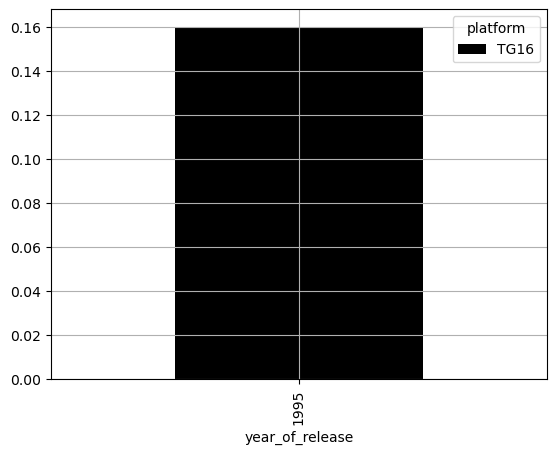

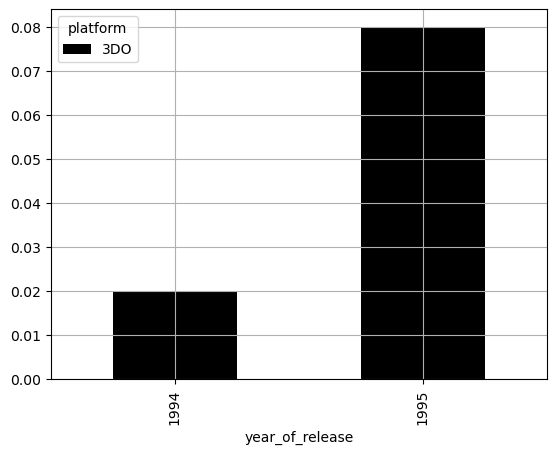

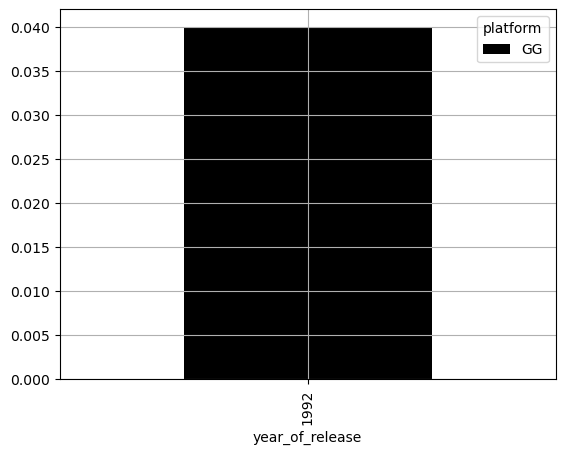

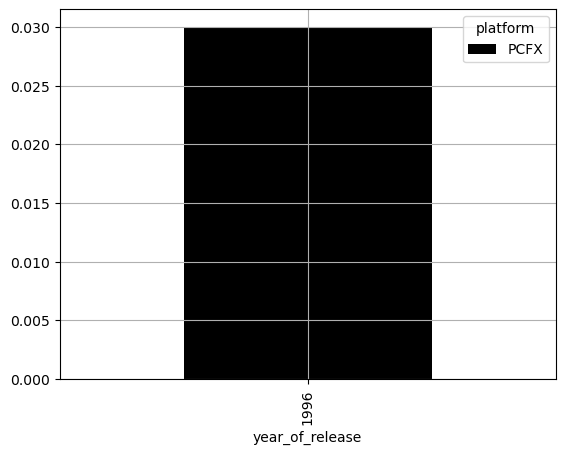

In [31]:
for i in df['platform'].unique(): #создаем цикл, который будет проходить по каждой платформе и строить по ней график 
    df_platform= df.loc[df['platform']==i]
    df_platform = df_platform.pivot_table(index = 'year_of_release', columns = 'platform', values='all_sales', aggfunc='sum')
    df_platform.plot(kind ='bar', color = 'black', grid = True)

Проанализировав графики можно сделать вывод, что самая стойкая платформа PC. Так же за период с 1992 года по 2004 год исчезло 15 платформ, но на смену старым появились новые 9 платформ (3DS, DS, Wii, WiiU, X360, XOne, PS3, PS4, PSV). А до 2014 года дожило только 10 платформ (3DS, Wii, WiiU, X360, XOne, PC, PS3, PS4, PSP, PSV). 
Так же по графикам видно, как падают продажи у прошлых версий платформ при запуске новой платфоры. Это можно проследить на примере PS и всей их серии до PS4, проанализировав данные в сводной таблице.
Еще видно, что у большинства платформ идет спад продаж после 2014 года, что могло быть связано с кризисом во всем мире.

In [32]:
#создание сводной таблицы
year_mean= (df.loc[:,['year_of_release', 'platform']]
        .drop_duplicates()
        .pivot_table(index='platform', values='year_of_release', aggfunc='count')
       )
year_mean

,year_of_release
platform,
3DO,2
3DS,6
DC,7
DS,10
GB,9
GBA,8
GC,7
GEN,3
GG,1


In [33]:
year_mean.describe() #числовое описание данных

,year_of_release
count,30.000000
mean,6.933333
std,4.784554
min,1.000000
25%,3.250000
50%,6.500000
75%,9.750000
max,24.000000


Проанализировав все графики, можно сделать вывод, что средняя продолжительность существования платформ равно 6.9 лет, что можно округлить до 7 лет.

Теперь построим новую сводную таблицу, для изучения суммы продаж каждой с 1992 по 2016 года.

In [34]:
#построение новой сводной таблицы 
df_platform= df.pivot_table(index= 'platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales',ascending=False) 
df_platform

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


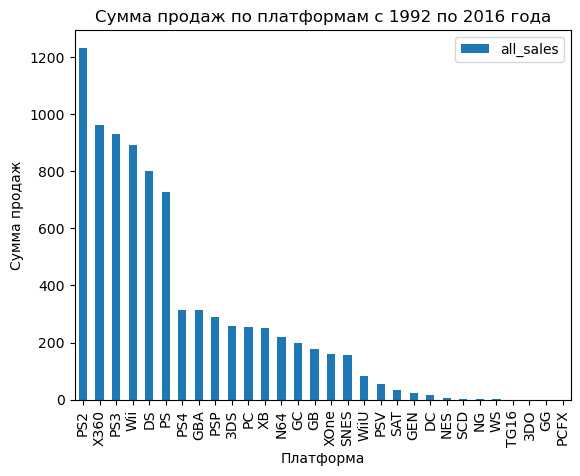

In [35]:
df_platform.plot(kind='bar') #построение графика
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.title('Сумма продаж по платформам с 1992 по 2016 года')
plt.show()

По этим данным видно, какая платформа больше сделала продаж. Лидирующая платформа PS2, но после 2006 года у нее пошел спад продаж, так до 2012 года эта платформа не дожила, но у нее появились новые версии, а это PS3, а потом PS4.
В первую десятку по количеству продаж входит 6 платформ, которые дожили до 2014 года ( 3DS, Wii, X360, PS3, PS4, PSP). Во вторую десятку вошли остальные 4 платформы, дожившиве до 2014 года (WiiV, XOne, PC, PSV). 

### 3.3 Актуальные данные
<a id="actual"></a>

Актуальный период - это данные за 2014 - 2016 года, в них есть платформы, на основе которых можно сделать дальнейший прогноз на 2017 год. 

In [36]:
df_actual=df.query('2013 < year_of_release').reset_index(drop=True) #срез данных для анализа актуальных данных
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,tbd,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,0.0,tbd,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,tbd,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1684,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,tbd,0.01
1685,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0,0.0,tbd,0.01
1686,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,tbd,0.01
1687,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,tbd,0.01


In [37]:
# создание сводной таблицы 
df_platform=(df_actual.pivot_table(index='platform', values='all_sales', aggfunc='sum')
   .sort_values(by='all_sales',ascending=False)
            )
df_platform

,all_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


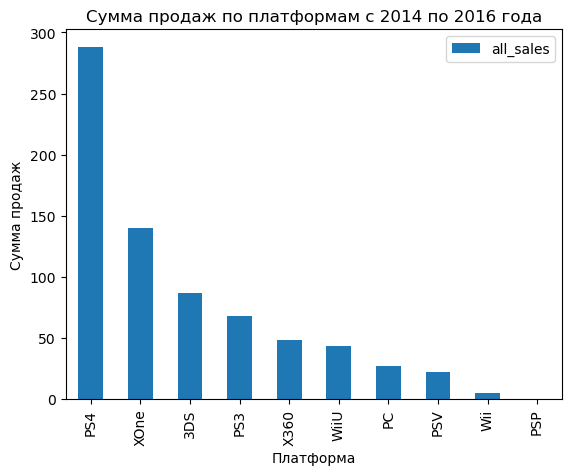

In [38]:
df_platform.plot(kind='bar') #построение графика
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.title('Сумма продаж по платформам с 2014 по 2016 года')
plt.show()

По данным продаж с 2014 по 2016 года видно, что выгоднее всего продавать игры на PS4 и XOne. Их общая сумма продаж (428.51) на 30 % больше суммы продаж игр на других платформах вместе взятых. При этом я бы посоветовала продолжить продавать игры на PC, так как компьтеры есть почти в каждом доме и играть на них все равно продолжают. А на старые версии игровых консолей лучше снизить количество игр, так как они уже не сильно пользуются спросом после выхода новых версий. Так же стоит оставить игры на X360, так как их можно использовать еще и на XOne.
Единственное, стоит убрать игры на PSP, так как такая плотформа закрылась в 2015 году.
Поэтому эту платформу мы можем убрать из актуальных данных.


In [39]:
df_actual= df_actual.query('platform !="PSP"').reset_index(drop=True) #срез данных для дальнейшего анализа актуальных данных
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,tbd,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,0.0,tbd,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,tbd,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1671,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,tbd,0.01
1672,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0,0.0,tbd,0.01
1673,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,tbd,0.01
1674,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,tbd,0.01


### 3.4 Построение ящика с усами по глобальным продажам игр 
<a id="global_game"></a>

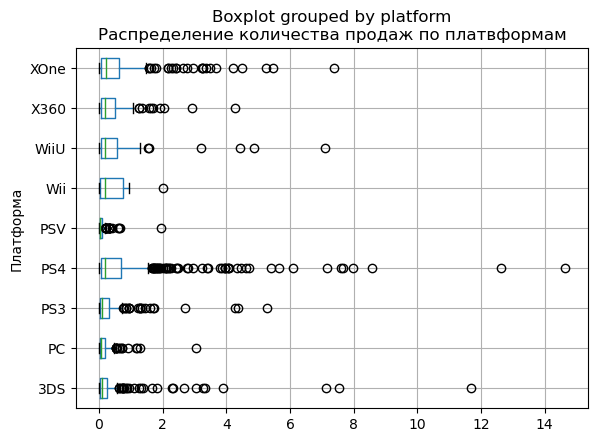

In [40]:
df_actual.boxplot(by='platform', column='all_sales', vert= False)#построение ящиков с усами
plt.ylabel('Платформа')
plt.title('Распределение количества продаж по платвформам')
plt.show()

На PS4 и XOne чаще всего продают игры по 0.1 - 1.8 миллионов копий, у них примерно одинаковое количество продаж, но у PS4 все равно немного больше.
После идет платформа WiiU, которая продает игры от 0.1 - 1.5 миллионов копий по всему миру.
Дальше следует платформа X360 c продажами копий до 1 миллиона. А затем идет платформа Wii, у которой чуть меньше миллиона продаж копий. 

Дальше потроим сводные таблицы и сделаем срезы данных по самым продаваемым играм на каждой актуальной платформе

In [41]:
ds3=df_actual.query('platform == "3DS" & all_sales >4')#срез данных
ds3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,0.0,tbd,11.68
7,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,0,0.0,tbd,7.55
10,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,0,0.0,tbd,7.14


Самые продаваемые на этой платформе игры : Pokemon Omega Ruby/Pokemon Alpha Sapphire, Super Smash Bros. for Wii U and 3DS, Pokemon Sun/Moon.

In [42]:
wii= df_actual.query('platform == "Wii" & all_sales> 2') #срез данных
wii

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
80,Just Dance 2015,Wii,2014,Misc,0.99,0.85,0.0,0.17,0,8.4,E10+,2.01


Успешная игра Just Dance 2015 на платформе Wii c 2014 по 2016 года.

In [43]:
wiiu= df_actual.query('platform == "WiiU" & all_sales> 4') #срез данных
wiiu

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
11,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88,9.1,E,7.09
18,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,0,0.0,tbd,4.87
23,Splatoon,WiiU,2015,Shooter,1.54,1.18,1.46,0.26,81,8.5,E10+,4.44


Популярные игра на этой платформе: Mario Kart 8, Super Smash Bros. for Wii U and 3DS, Splatoon.

In [44]:
x360= df_actual.query('platform == "X360" & all_sales> 2') #срез данных
x360

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
26,Call of Duty: Advanced Warfare,X360,2014,Shooter,2.77,1.11,0.0,0.40,0,4.9,M,4.28
54,FIFA 15,X360,2014,Sports,0.79,1.92,0.0,0.21,0,4.2,E,2.92
79,Madden NFL 15,X360,2014,Sports,1.77,0.06,0.0,0.22,0,5.5,E,2.05


Успешные игры на платформе X360: Call of Duty: Advanced Warfare, FIFA 15, Madden NFL 15.

In [45]:
xone= df_actual.query('platform == "XOne" & all_sales> 5') #срез данных
xone

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,0,0.0,tbd,7.39
14,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
16,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26


Самые продаваемые игры на платформе XOne, а именно Call of Duty: Black Ops 3, Grand Theft Auto V, Call of Duty: Advanced Warfare.

In [46]:
pc= df_actual.query('platform == "PC" & all_sales> 1') #срез данных
pc

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
51,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70,3.9,T,3.05
135,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84,5.4,M,1.28
148,Farming Simulator 2015,PC,2014,Simulation,0.08,1.04,0.0,0.07,0,0.0,tbd,1.19
152,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.0,0.09,96,7.9,M,1.17


Популярные игры на ПК: The Sims 4, Fallout 4, Farming Simulator 2015, Grand Theft Auto V.

In [47]:
ps4= df_actual.query('platform == "PS4" & all_sales> 7.5') #срез данных
ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,tbd,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,0.0,tbd,7.98
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
6,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60


Игры которые больше всего продавались на платформе PS4: Call of Duty: Black Ops 3, Grand Theft Auto V, FIFA 16, Star Wars Battlefront (2015), Call of Duty: Advanced Warfare, FIFA 17.

In [48]:
ps3= df_actual.query('platform == "PS3" & all_sales> 2') #срез данных
ps3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
17,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,0,0.0,tbd,5.27
24,Call of Duty: Advanced Warfare,PS3,2014,Shooter,1.56,1.93,0.19,0.68,0,4.8,M,4.36
27,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,0,4.5,E,4.28
58,FIFA 16,PS3,2015,Sports,0.41,1.84,0.05,0.40,0,3.2,E,2.70


Игры на платформе PS3, которые продавались лучше всего: Minecraft, Call of Duty: Advanced Warfare, FIFA 15, FIFA 16.

In [49]:
psv= df_actual.query('platform == "PSV" & all_sales> 1.8') #срез данных
psv

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
82,Minecraft,PSV,2014,Misc,0.18,0.64,0.9,0.24,0,0.0,tbd,1.96


На этой платформе чаще всего продавалась игра Minecraft.

Проанализировав все данные в этом исследовании, можно сказать, что самые продаваемые игры на разных платформах это - FIFA и Call of duty: Advanced Warfare. Потом идет Grand Theft Auto V и Minecraft.

Топовые платформы : 
- PS4 
- XOne
- WiiU
- X360
- Wii

### 3.5 Влияние на продажи игр отзывов пользователей и критиков
<a id="critic"></a>

Самая популярная платформа в актуальных данных это PS4.  По ней мы проведем анализ влияния отзывов пользователей и критиков на продажи игр, построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [50]:
ps4= df_actual.query('platform == "PS4" & critic_score > 0 & user_score > 0') #срез данных
ps4.reset_index(drop=True) #вывод на экран актуальных данных по популярной плтаформе 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
1,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
2,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
3,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
4,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
229,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.00,42,2.3,E10+,0.01
230,Sherlock Holmes: The Devil's Daughter,PS4,2016,Adventure,0.01,0.00,0.00,0.00,70,6.8,T,0.01
231,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69,7.5,tbd,0.01
232,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61,7.9,T,0.01


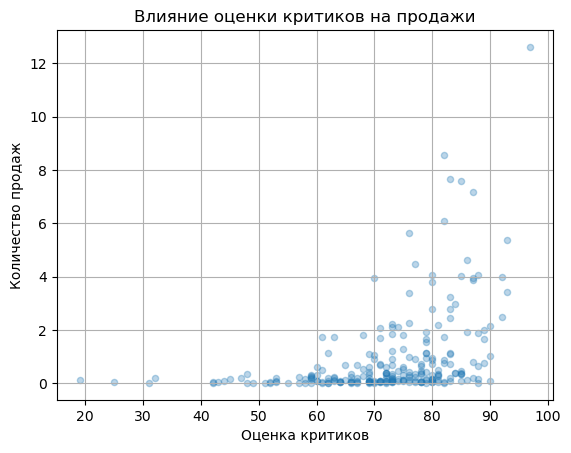

In [51]:
ps4.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.3, grid=True) #построение диаграммы рассеяния
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж')
plt.title('Влияние оценки критиков на продажи')
plt.show()

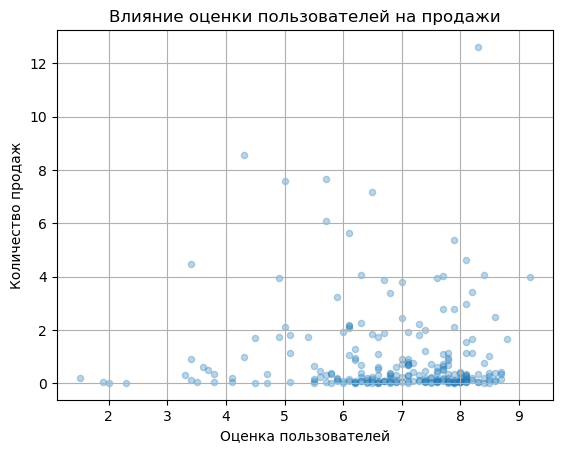

In [52]:
ps4.plot(x='user_score', y='all_sales', kind='scatter', alpha=0.3, grid=True) #построение диаграммы рассеяния
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж')
plt.title('Влияние оценки пользователей на продажи')
plt.show()

По диаграммам не видно явной положительной корреляции между оценками критиков или пользователей и продажами. Поэтому посчитаем корреляцию. 

In [53]:
print(ps4['user_score'].corr(ps4['all_sales'])) #подсчет корреляции
ps4['critic_score'].corr(ps4['all_sales']) #подсчет корреляции

-0.04318585997193629


0.401902878114753

Такие цифры корреляции говорят о том, что связь есть между оценками критиков и общим количеством продаж, но она не слишком сильная. Но при этим корреляция в оценке пользователей по отношению к продажа отрицательная, значит влияния здесь прямого нет. Но у нас много данных без оценки пользователей и критиков, поэтому данный анализ стоит повторить, когда будут известны все оценки.

Теперь проверим корреляцию по другим актуальным платформам.

In [54]:
df_actual_new= df_actual.query('platform != "PS4" & critic_score > 0 & user_score > 0').reset_index(drop=True) #срез данных 
df_actual_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88,9.1,E,7.09
1,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
2,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26
3,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49
4,Splatoon,WiiU,2015,Shooter,1.54,1.18,1.46,0.26,81,8.5,E10+,4.44
...,...,...,...,...,...,...,...,...,...,...,...,...
465,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65,6.0,M,0.01
466,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63,8.2,E,0.01
467,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81,8.5,E,0.01
468,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.7,tbd,0.01


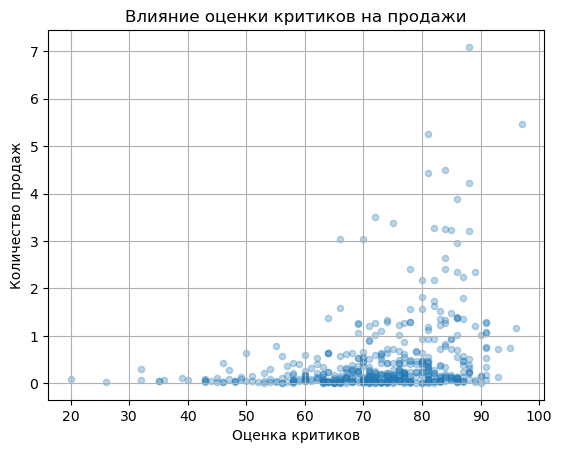

In [55]:
df_actual_new.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.3, grid=True) #построение диаграммы рассеяния
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж')
plt.title('Влияние оценки критиков на продажи')
plt.show()

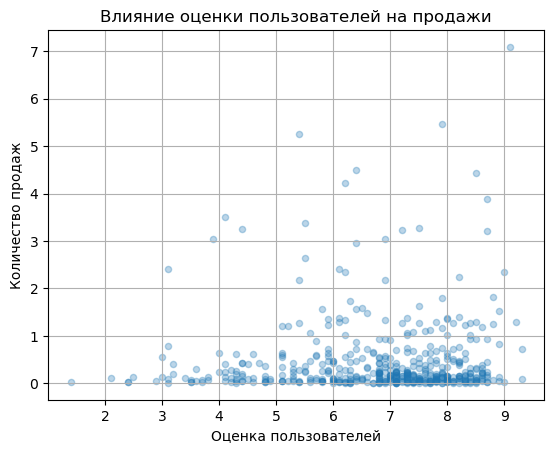

In [56]:
df_actual_new.plot(x='user_score', y='all_sales', kind='scatter', alpha=0.3, grid=True) #построение диаграммы рассеяния
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж')
plt.title('Влияние оценки пользователей на продажи')
plt.show()

In [57]:
print(df_actual_new['user_score'].corr(df_actual_new['all_sales'])) #подсчет корреляции
df_actual_new['critic_score'].corr(df_actual_new['all_sales']) #подсчет корреляции

0.043490043669444305


0.3047894679009595

Проанализировав диаграммы рассеяния по всем актульным платформам и PS4, можно сделать вывод, что положительная корреляция по отношению к продажам только у оценки критиков, но она слабая. У оценки пользователей корреляция на платформе PS4 отрицательная, а на остальных платформах положительная, но не сильно. Это значит, что на продажи игр влияет оценка критиков на всех платформах, но не сильно.

### 3.6 Анализ жанров
<a id="genre"></a>

In [58]:
df_genre=df_actual.pivot_table(index='genre', values= 'all_sales', aggfunc=['mean','count']) #создание сводной таблицы
df_genre

,mean,count
,all_sales,all_sales
genre,,
Action,0.324894,613
Adventure,0.096685,181
Fighting,0.470333,60
Misc,0.338108,111
Platform,0.476053,38
Puzzle,0.157857,14
Racing,0.398841,69
Role-Playing,0.459005,221


По сводной таблице можно выделить топ-5 жанров, которые чаще всего выпускают: Action, Role-Playing, Adventure, Sports, Shooter. Но при это топ-5 жанров по продаваемости другие: Shooter, Sports, Platform, Fighting, Racing.

В этом разделе мы проанализировали распределение платформам по годам и выбрали в качестве актуальных данных 2014-2016 года, так как в них остались платформы, по которым можно будет дальше сделать прогноз на 2017 год. Так же было выявлено, что продажи на всех платформах падают. Но при этом самые продаваемые платформы это- PS4 и XOne. C помощью построения ящика с усами, было выявлено, что больше всего продаж копий во всех странах у платформы XOne, от 0.1 до 1.5 миллионов продаж за одну игру. 
Мы еще выяснили, что корреляция у оценков пользователей или критиков и продаж положительная, но незначительная. Из этого можно сделать вывод, что не всегда на продажи влияют оценки пользователей или критиков.

Топ-5 жанров по выпуску игр:
- Action
- Role-Playing
- Adventure
- Sports
- Shooter.

Топ-5 жанров по продажам:
- Shooter
- Sports
- Platform
- Fighting
- Racing

## 4 Портрет пользователя для каждого региона 
<a id="portret"></a>

### 4.1 Определение популярных платформ
<a id="popular_platform"></a>

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
WiiU,19.36
Wii,2.08


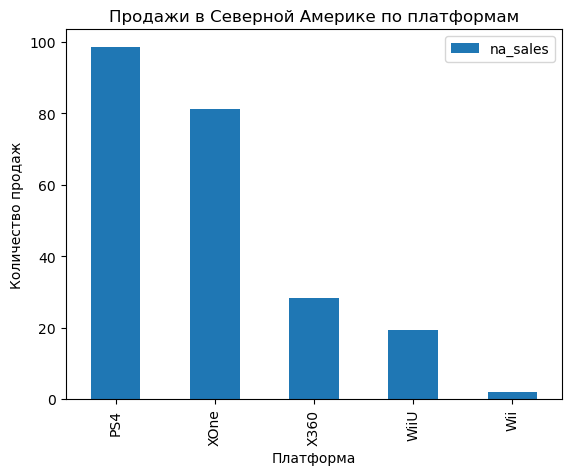

In [59]:
df_actual_platform=(df_actual.query('platform =="XOne"| platform =="PS4" | platform =="WiiU"|platform =="X360"| platform =="Wii"')
                    .reset_index(drop=True)
                   )#срез данных

df_na=(df_actual_platform.pivot_table(index='platform', values='na_sales', aggfunc='sum')
       .sort_values(by='na_sales',ascending=False)
      )#создание сводной таблицы и сортировка ее по убыванию
df_na.plot(kind='bar') #создание диаграммы
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.title('Продажи в Северной Америке по платформам')
df_na

Изучив данные по продажам топовых платформ в Северной Америке, можно сделать вывод, что у них лучше всего продаются игра на платформы PS4, XOne. Так же неплохо у них продаются игра на X360, так как их можно использовать еще и на XOne. 

,eu_sales
platform,
PS4,130.04
XOne,46.25
X360,15.49
WiiU,13.15
Wii,2.59


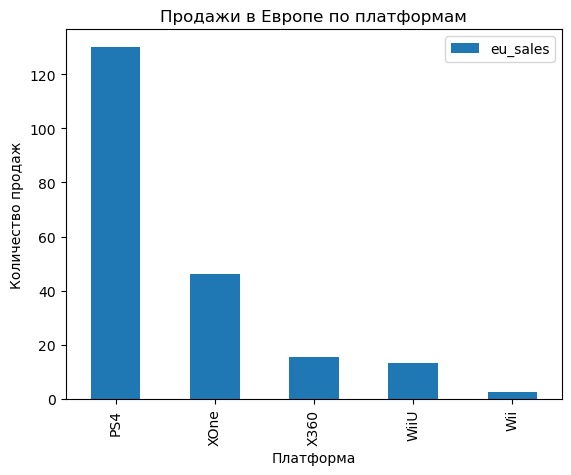

In [60]:
df_eu=(df_actual_platform.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
       .sort_values(by='eu_sales',ascending=False)
      )#создание сводной таблицы и сортировка ее по убыванию
df_eu.plot(kind='bar') #создание диаграммы
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.title('Продажи в Европе по платформам')
df_eu

Изучив данные по продажам топовых платформ в Европе, можно сделать вывод, что у них самая популярная платформа PS4, продажи игр на эту платформу составляют 62.6% от суммы всех продаж по популярным платформам. Потом идет платформа XOne, но сумма ее продаж меньше PS4 на 83.79 миллиона копий.

,jp_sales
platform,
PS4,15.02
WiiU,7.31
XOne,0.32
X360,0.08
Wii,0.00


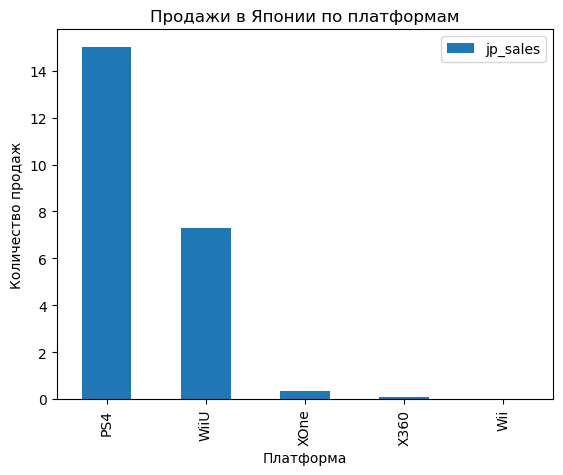

In [61]:
df_jp=(df_actual_platform.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
       .sort_values(by='jp_sales',ascending=False)
      )#создание сводной таблицы и сортировка ее по убыванию
df_jp.plot(kind='bar') #создание диаграммы
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
plt.title('Продажи в Японии по платформам')
df_jp

Изучив данные по продажам платформ в Японии, можно сделать вывод, что у них самая популярная платформа PS4, продажи игр на эту платформу составляют 66% от суммы всех продаж по популярным платформам. После идет платформа WiiU, сумма ее продаж меньше PS4 на 7.71 миллиона копий.

В итоге во всех этих регионах самым большим спросом пользуется платформа PS4. Но при этом картина распределения топовых платформ одинакова у Северной Америки и Европы, а у Японии есть раазличие с ними, так как у нее на втором месте идет платформа WiiU. Такое различие может быть связано с разностью культуры.

### 4.2 Популярные жанры 
<a id="popular_genre"></a>

,na_sales
genre,
Shooter,79.02
Sports,46.13
Fighting,12.43
Racing,8.74
Platform,6.79


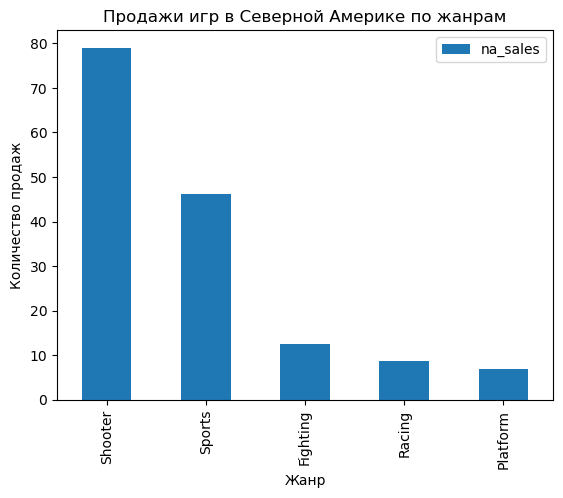

In [62]:
df_actual_genre=(df_actual.query('genre =="Sports"|genre =="Shooter"|genre =="Platform"|genre =="Fighting"|genre =="Racing"')
                    .reset_index(drop=True)
                   ) #срез данных
df_na=(df_actual_genre.pivot_table(index='genre', values='na_sales', aggfunc='sum')
       .sort_values(by='na_sales',ascending=False)
      )#создание сводной таблицы и сортировка ее по убыванию
df_na.plot(kind='bar')#создание диаграммы
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.title('Продажи игр в Северной Америке по жанрам')
df_na

51% людей в Северной Америке выбирают игры из топовых жанров по всему миру в жанре Shooter, а на втором месте идет жанр Sports

,eu_sales
genre,
Shooter,65.52
Sports,45.73
Racing,14.13
Platform,6.80
Fighting,6.69


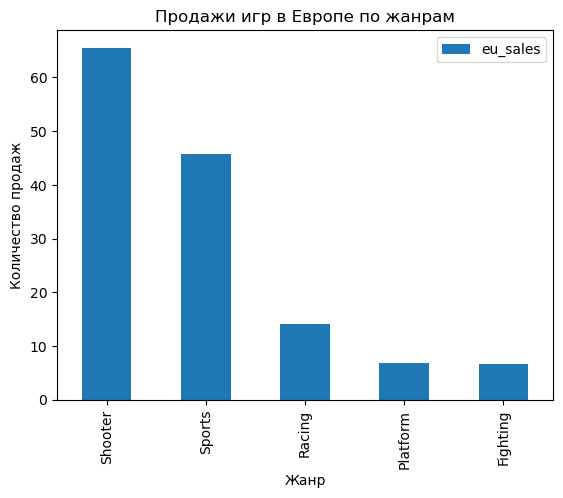

In [63]:
df_eu=(df_actual_genre.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
       .sort_values(by='eu_sales',ascending=False)
      )#создание сводной таблицы и сортировка ее по убыванию
df_eu.plot(kind='bar')#создание диаграммы
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.title('Продажи игр в Европе по жанрам')
df_eu

47% людей в Европе выбирают игры из топовых жанров по всему миру в жанре Shooter, а на втором месте идет жанр Sports, но он занимает 33% из общей суммы топовых жанров по всему миру

,jp_sales
genre,
Fighting,6.37
Shooter,4.87
Sports,3.17
Platform,2.69
Racing,1.76


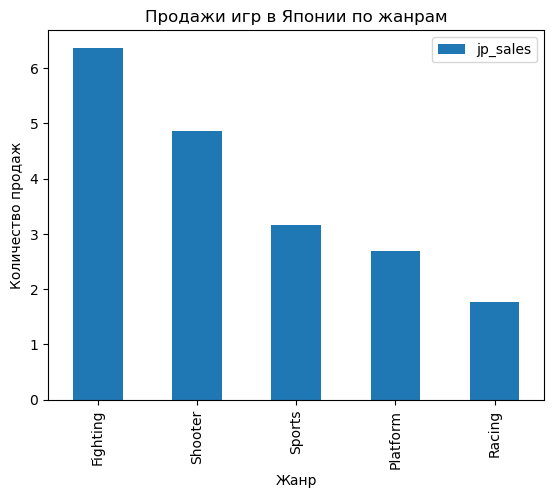

In [64]:
df_jp=(df_actual_genre.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
       .sort_values(by='jp_sales',ascending=False)
      )#создание сводной таблицы и сортировка ее по убыванию
df_jp.plot(kind='bar')#создание диаграммы
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')
plt.title('Продажи игр в Японии по жанрам')
df_jp

В Японии совсем другая картина, у них в лидеры выходит жанр Fighting, что составляет 33% продаж от общей суммы продаж по топ жанрам во всем мире. На втором месте находится жанр Shooter, а потом уже Sports. Такое небольшое различие в жанрах с Европой и Северной Америкой скорее всего связано с разностью культуры.

### 4.3 Влияние рейтинга ESRB на продажи 
<a id="esrb"></a>

Значения рейтингов:
- tbd - еще не известен рейтинг
- М - для взрослых
- Е - для всех 
- Т - для подростков
- Е10+ - для всех старше 10 лет

In [65]:
df_actual_rating= df_actual.query('rating != "tbd"') #убираем значения, которые еще не известны

In [66]:
na_rating= (df_actual_rating.pivot_table(index='rating', values='na_sales',aggfunc='sum')
            .sort_values(by='na_sales',ascending=False)
      )#создание сводной таблицы и сортировка ее по убыванию
print(na_rating)

eu_rating= (df_actual_rating.pivot_table(index='rating', values='eu_sales',aggfunc='sum')
            .sort_values(by='eu_sales',ascending=False)
      )#создание сводной таблицы и сортировка ее по убыванию
print(eu_rating)

jp_rating=(df_actual_rating.pivot_table(index='rating', values='jp_sales',aggfunc='sum')
          .sort_values(by='jp_sales',ascending=False)
      )#создание сводной таблицы и сортировка ее по убыванию 
print(jp_rating)

        na_sales
rating          
M          96.42
E          50.74
T          38.95
E10+       33.23
        eu_sales
rating          
M          93.44
E          58.06
T          34.07
E10+       26.16
        jp_sales
rating          
T          14.78
E           8.94
M           8.01
E10+        4.46


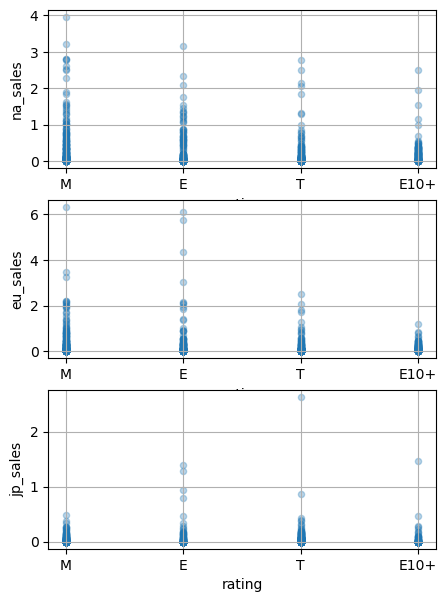

In [67]:
fig,axis = plt.subplots(3,1, figsize=(5,7))
df_actual_rating.plot(x='rating', y='na_sales', kind='scatter', alpha=0.3, grid=True, ax=axis[0])
df_actual_rating.plot(x='rating', y='eu_sales', kind='scatter', alpha=0.3, grid=True, ax=axis[1])
df_actual_rating.plot(x='rating', y='jp_sales', kind='scatter', alpha=0.3, grid=True, ax=axis[2])
plt.show()

По данной диаграмме рассеяния видно, что в Северной Америке есть положительная зависимость продаж от возрастного рейтинга. Чем выше возраст покупателя, тем больше продается игра. Так меньше всего продаж в играх для всех старше 10 лет, а больше всего продаж у взрослых. Похожая картина с зависимостью продаж от рейтинга сохраняется и в Европе. 

В Японии больше всего продаются игры для подростков, но точный вывод по этим данным мы не можем сделать, так как больше половины данных без возрастного рейтинга. Рекомендую для повторного анализа данных делать выгрузку с рейтингами от разных компаний, таких как PEGI(Pan European Game Information) и CERO(Computer Entertainment Rating Organization).

В итоге получается, что в Северной Америке и Европе прослеживается положительная корреляция от продаж и возрастного рейтинга, чем больше возрастной рейтинг, тем больше продаж. Насчет Японии пока что точного вывода сделать нельзя, так как у них отличается культура от Европы и Северной Америки, из-за этого может быть различие во взаимосвязи возрастного рейтинга и продаж.

## 5 Проверка гипотез
<a id="gip"></a>

### 5.1 Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые
<a id="gip1"></a>

Нулевая гипотеза- средние пользовательские рейтинги платформ Xbox One и PC одинаковые . Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC разные

In [68]:
from scipy import stats as st #импортируем библиотеку stats

In [69]:
# делаем срез данных по pc и user_score >0, тк раньше мы заполнили 0 пустые значения 
pc_score= df_actual.query('platform =="PC" & user_score > 0').reset_index(drop=True) 
pc_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70,3.9,T,3.05
1,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84,5.4,M,1.28
2,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.0,0.09,96,7.9,M,1.17
3,The Elder Scrolls Online,PC,2014,Role-Playing,0.32,0.51,0.0,0.07,71,5.7,M,0.90
4,Dragon Age: Inquisition,PC,2014,Role-Playing,0.33,0.34,0.0,0.06,85,5.9,M,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...
117,Fallout Anthology,PC,2015,Action,0.00,0.01,0.0,0.00,0,8.3,tbd,0.01
118,TrackMania Turbo,PC,2016,Action,0.00,0.01,0.0,0.00,79,6.8,E,0.01
119,Ride 2,PC,2016,Racing,0.00,0.01,0.0,0.00,78,7.9,E,0.01
120,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.0,0.00,0,1.4,E,0.01


In [70]:
# делаем срез данных по xone и user_score >0, тк раньше мы заполнили 0 пустые значения 
xone_score= df_actual.query('platform =="XOne" & user_score > 0').reset_index(drop=True) 
xone_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
1,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26
2,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49
3,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88,6.2,M,4.22
4,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72,4.1,M,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
160,Assassin's Creed Chronicles,XOne,2016,Action,0.00,0.01,0.00,0.00,0,6.8,T,0.01
161,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65,6.0,M,0.01
162,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63,8.2,E,0.01
163,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,0,6.6,E,0.01


In [71]:
#используем метод для провекри нулевой гипотезы о равенстве среднего pc и xone
results= st.ttest_ind(pc_score['user_score'], xone_score['user_score'], equal_var =False) 

In [72]:
alpha= .05 #задаем пороговое значение alpha
print('p-значение:', results.pvalue)

p-значение: 0.11601398086668832


In [73]:
#создание функции
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не отвергаем нулевую гипотезу')

Не отвергаем нулевую гипотезу


У нас была нулевая гипотеза- средние пользовательские рейтинги платформ Xbox One и PC одинаковые , а альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC разные. Значение p-value показыывает: вероятность получить такое или большее различие равно 11.6%. В итоге с помощью анализа было обнаружено, что нулевая гипотеза имеет смысл быть, поэтому с ней можно проводить дальнейшую работу .

### 5.2 Средние пользовательские рейтинги жанров Action и Sports разные
<a id="gip2"></a>

Нулевая гипотеза- средние пользовательские рейтинги жанров Action и Sports одинаковые. Альтернативная гипотеза -средние пользовательские рейтинги жанров Action и Sports разные

In [74]:
# делаем срез данных по жанру action и user_score >0, тк раньше мы заполнили 0 пустые значения 
action= df_actual.query('genre =="Action" & user_score > 0').reset_index(drop=True) 
action

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
1,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
2,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86,8.1,T,4.62
3,Watch Dogs,PS4,2014,Action,1.40,1.90,0.11,0.64,80,6.3,M,4.05
4,Assassin's Creed: Unity,PS4,2014,Action,1.19,2.07,0.08,0.62,70,4.9,M,3.96
...,...,...,...,...,...,...,...,...,...,...,...,...
292,Assassin's Creed Chronicles,XOne,2016,Action,0.00,0.01,0.00,0.00,0,6.8,T,0.01
293,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65,6.0,M,0.01
294,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81,8.5,E,0.01
295,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.7,tbd,0.01


In [75]:
# делаем срез данных по жанру sports и user_score >0, тк раньше мы заполнили 0 пустые значения 
sports= df_actual.query('genre =="Sports" & user_score > 0').reset_index(drop=True)
sports

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
1,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
2,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82,5.7,E,6.08
3,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,0,4.5,E,4.28
4,NBA 2K16,PS4,2015,Sports,2.49,0.66,0.03,0.69,87,6.7,E10+,3.87
...,...,...,...,...,...,...,...,...,...,...,...,...
122,NBA 2K17,PC,2016,Sports,0.00,0.01,0.00,0.00,90,6.3,E,0.01
123,MLB 15: The Show,PSV,2015,Sports,0.01,0.00,0.00,0.00,0,8.8,E,0.01
124,Don Bradman Cricket 14,PS3,2014,Sports,0.00,0.01,0.00,0.00,73,6.9,E,0.01
125,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.00,0.00,0,1.4,E,0.01


In [76]:
#используем метод для провекри нулевой гипотезы о разности среднего жанров action и sports
results2= st.ttest_ind(action['user_score'], sports['user_score'], equal_var =False) 

In [77]:
alpha= .05#задаем пороговое значение alpha
print('p-значение:', results2.pvalue)

p-значение: 1.1825550382644557e-14


In [78]:
#создание функции
if results2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не отвергаем нулевую гипотезу')

Отвергаем нулевую гипотезу 


Нулевая гипотеза- средние пользовательские рейтинги жанров Action и Sports одинаковые , а альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports разные. Значение p-value показывает: вероятность получить одинаковые средние показатели пользовательских рейтингов жанров Action и Sports равна 1.18е-14. Это значит, что вероятность этого очень мала, поэтому смело можно отвергать нулевую гипотезу, значит средние показатели пользовательских рейтингов у жанров Action и Sports разные.

## 6 Вывод
<a id="all"></a>

В данной работе был проделан анализ данных, собранных из открытых источников за 1980 - 2016 года о продажах игр в разных странах, оценках пользователей и экспертов, жанров и платформах. С помощью этих данных и анализа мы выявили определяющие закономерности успешности игры. Это позволило нам сделать прогноз на продажи игр на 2017 год.

В ходе работы мы для начала сделали предобработку данных, где изменили названия столбцов, изменив их регистр. Далее мы провели работу с пропущенными значениями, в каких-то столбцых мы их удалили, а в каких-то заменили. Так же мы заменили тип данных в столбцах, где это было нужно.

В третьем блоке мы провели исследовательский анализ данных. В нем было выявлено, что рост выпуска компьютерных игр начался с 1991 года. Был определен средний возраст жизни платформы и это 7 лет. Так же была определена самая стойкая платформа - это PС, она с нами с 1992 года и по сей день существует и на нее делаются игры. За период с 1992 года по 2004 год исчезло 15 платформ, но на смену старым появились новые 9 платформ (3DS, DS, Wii, WiiU, X360, XOne, PS3, PS4, PSV). Но до 2014 года дожило только 10 платформ (3DS, Wii, WiiU, X360, XOne, PC, PS3, PS4, PSP, PSV).
Мы проводили анализ суммы продаж по каждой платформе с 1992 по 2016 года.  Лидирующая платформа PS2, но после 2006 года у нее пошел спад продаж, так до 2012 года эта платформа не дожила из-за выхода новых версий, а это PS3, а потом PS4. В первую десятку по количеству продаж входит 6 платформ, которые дожили до 2014 года ( 3DS, Wii, X360, PS3, PS4, PSP). Во вторую десятку вошли остальные 4 платформы, дожившие до 2014 года (WiiV, XOne, PC, PSV).

Такое исследование данных помогло выбрать актуальные данные, для прогнозирования продаж на 2017 год.  Мы взяли данные за 2014 - 2016 года. Это те года, в которых есть все актуальные платформы, дожившие до 2016 года. По этим годам видно, что у всех платформ идет спад продаж, что возможно связано с началом кризиса после 2014 года. 

Изучив данные о продажа во всем мире , можно сделать вывод, что выгоднее всего продавать игры на топовых платформах.

Топовые платформы : 
- PS4 
- XOne
- WiiU
- X360
- Wii

При этом я бы посоветовала продолжить продавать игры на PC, так как компьтеры есть почти в каждом доме и играть на них все равно продолжают. А на старые версии игровых консолей лучше снизить количество игр, так как они уже не сильно пользуются спросом после выхода новых версий. Так же я бы посоветовала оставить игры на 3DS, так как эта платформа пользуется большим спросом в Японии. Единственное, стоит убрать игры на PSP, так как такая плотформа закрылась в 2015 году.

Топ-4 игры, продаваемые на разные платформах :
- FIFA;
- Call of duty: Advanced Warfare;
- Grand Theft Auto V;
- Minecraft.

В ходе работы мы проверили влияние отзывов пользователей и критиков на продажи.  Корреляция на плафторме PS4( самая популярная платформа) у критиков равна 0.401 , а у пользователей -0.043. Корреляция на других платформах у критиков равна 0.304, а у пользователей 0.043. Все эти показатели говорят о том, что положительная корреляция по отношению к продажам только у оценки критиков, но она слабая. У оценки пользователей корреляция на платформе PS4 отрицательная, а на остальных платформах положительная, но не сильно. Это значит, что на продажи игр влияет оценка критиков на всех платформах, но не сильно.

Мы провели анализ жанров, которые чаще всего выпускают и какие больше всего продают. 

Топ-5 жанров, которые выпускают:
- Action
- Role-Playing
- Adventure
- Sports
- Shooter.

Топ-5 жанров по продажам:
- Shooter
- Sports
- Platform
- Fighting
- Racing

в четвертом разделе мы составили портрет пользователей Северной Америки, Европы и Японии.

В Северной Америке люди чаще всего приобретаю игра на PS4, XOne в жанрах Shooter и Sports. Так же в этой стране прослеживается положительная зависимость продаж от возрастного рейтинга. Чем выше возраст покупателя, тем больше продается игра. 

В Европе люди приобретают игры на PS4, XOne в жанрах Shooter, Sports. Здесь как и в Северной Америке прослеживается положительная зависимость продаж от возрастного рейтинга. 

В Японии люди приобретают игры на PS4 и WiiU в жанрах Fighthing и Shooter. В Японии такая разница с Северной Америкой и Европой по платформам может быть свзяана с их культурой. В Японии больше всего продаются игры для подростков, но точный вывод по этим данным мы не можем сделать, так как больше половины данных без возрастного рейтинга. Рекомендую для повторного анализа данных делать выгрузку с рейтингами от разных компаний, таких как PEGI(Pan European Game Information) и CERO(Computer Entertainment Rating Organization).

В последнем разделе мы проверили 2 гипотезы. Первая нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC разные. В ходе анализа мы получили результат p-value равно 0.116, что больше alpha равной 0.05, это значит что вероятность получить такое или большее различие равно 11.6%. Значит данная гипотеза не отвергается .

Вторая нелувая гипотеза -  средние пользовательские рейтинги жанров Action и Sports одинаковые , а альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports разные. В ходе анализа мы получили результат p-value равно 1.18е-14, что меньше alpha равной 0.05, это значит что вероятность получить одинковое значение равно 1.18е-14. Значит вероятность этого очень мала, поэтому смело можно отвергать нулевую гипотезу, получается что средние показатели пользовательских рейтингов у жанров Action и Sports разные.

Подводя итог всей работы можно с уверенностью говорить, что в 2017 года стоит продавать в интернет- магазине «Стримчик» игры на платформы : PS4, XOne, PC, X360, Wii и WiiU. В жанрах: Shooter, Sports, Racing ,Platform и Fighting. Игры по большей части должны быть с рейтингом M(для взрослых), на втором месте E(для всех), а на третьем T(для подростков).  